# AlgoSB 2021

In [15]:
import sys

import  matplotlib as mpl
import matplotlib.pyplot as plt
import msmtools
import numpy as np
import pyemma
import scipy
from scipy.stats import multivariate_normal

In [16]:
# Version information
print("Python: ", *sys.version.split("\n"))

print("Packages:")
for package in [mpl, np, scipy, pyemma]:
    print(f"    {package.__name__}: {package.__version__}")

Python:  3.8.12 | packaged by conda-forge | (default, Oct 12 2021, 21:57:06)  [GCC 9.4.0]
Packages:
    matplotlib: 3.2.2
    numpy: 1.21.3
    scipy: 1.7.1
    pyemma: 2.5.9


In [17]:
# Matplotlib configuration
mpl.rc_file(
    "../matplotlibrc",
    use_default_template=False
)

## Data set generation

### Timeseries over states

In [47]:
P = np.array([
    [0.98, 0.00, 0.02],
    [0.00, 0.89, 0.11],
    [0.02, 0.11, 0.87],
])

In [48]:
sampled_msm = pyemma.msm.SampledMSM(P)
discrete_trajectory = sampled_msm.simulate(1000, dt=1)

In [49]:
discrete_trajectory

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1,

### States in space

In [50]:
state_centers = np.array([
    [-1, 1],
    [1, -1],
    [2, 2],
])
state_covs = np.array([
    [[0.1, 0.0],
     [0.0, 0.3]],
    [[0.4, 0.0],
     [0.0, 0.4]],    
    [[0.2, 0.0],
     [0.0, 0.2]],
])

state_distribution_map = {
    index: multivariate_normal(mean=center, cov=cov)
    for index, (center, cov) in enumerate(zip(state_centers, state_covs))
}

In [51]:
state_distribution_map[0].rvs()

array([-0.87615172,  1.57274208])

In [52]:
state_distribution_map[2].rvs()

array([2.65007536, 2.42639552])

### Final data set

In [53]:
trajectory = np.array([
    state_distribution_map[state].rvs()
    for state in discrete_trajectory
])

In [64]:
inter_state_transitions = []
for i, state in enumerate(discrete_trajectory[1:]):
    last_state = discrete_trajectory[i]

    if state != discrete_trajectory[i]:
        inter_state_transitions.append(i)

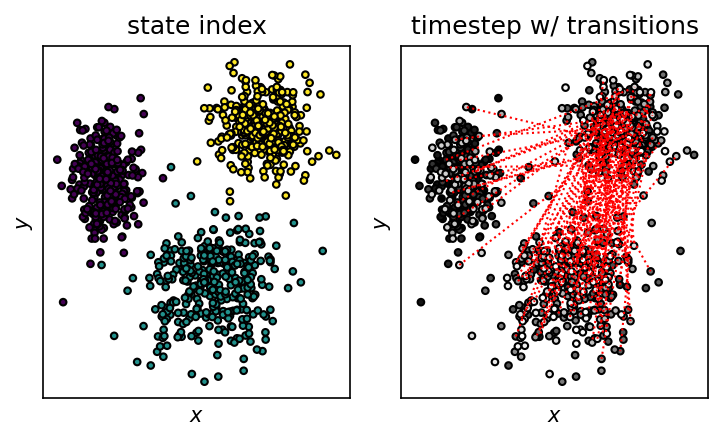

In [70]:
fig, (state_ax, time_ax) = plt.subplots(1, 2)
state_ax.scatter(
    *trajectory.T,
    c=discrete_trajectory,
    s=10,
    edgecolors="k", linewidths=1
)
time_ax.scatter(
    *trajectory.T,
    c=np.arange(trajectory.shape[0]),
    s=10,
    edgecolors="k", linewidths=1,
    cmap=mpl.cm.gray
)

for i in inter_state_transitions:
    start = trajectory[i]
    end = trajectory[i + 1]
    time_ax.plot(
        [start[0], end[0]], [start[1], end[1]],
        color="red", linestyle="dotted", linewidth=1,
    )

for ax in (state_ax, time_ax):
    ax.set(**{
        "aspect": "equal",
        "xticks": (),
        "yticks": (),
        "xlabel": "$x$",
        "ylabel": "$y$"
    })
    
state_ax.set_title("state index")
time_ax.set_title("timestep w/ transitions")

fig.tight_layout()

__Exercise__

## Scratch

In [109]:
def multivar_gaussian_pdf(x, cov, mu):
    """Multivariate gaussian PDF"""
    
    n = x.shape[0]
    
    assert n == mu.shape[0] == cov.shape[0] == cov.shape[1], f"! {n} == {mu.shape[0]} == {cov.shape[0]} == {cov.shape[1]}"
    
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    
    delta_xm = x - mu
    
    return 1 / ((2 * np.pi)**(n/2) * np.sqrt(det)) * np.exp(-0.5 * (delta_xm.T @ inv @ delta_xm))